# Data Science Worksheet

This worksheet is designed to help you learn the basics of doing data science in Python. Specifically, this worksheet is designed to give you practice in data structures in the NumPy and Pandas libraries, and plotting in Matplotlib/Pyplot.

## Setup

Before we get started, you should make sure you have the necessary packages: NumPy, Pandas, and Matplotlib.

If you have the standard distribution of Anaconda, these should already be installed. If not, you can install them with `conda install numpy pandas matplotlib`.

If you don't have Anaconda but are on Ubuntu, you should install the packages `python3-numpy`, `python3-pandas`, and `python3-matplotlib` with `apt`.

Otherwise, you should install the packages using the command `pip3 install -U numpy pandas matplotlib` from a terminal.

To test whether all of this works, try running the cell below. It should produce no output. If you get an error, you do not have the necessary packages. If you think you have installed them but it still does not work, you can try restarting the notebook kernel by selecting `Kernel -> Restart` in the top menu of Jupyter.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Notice that all of these import statements use the `import foo as bar` format, which allows you to refer to the package by the second name (which is usually shorter). In practice, it's particularly common to use `np`, `pd`, and `plt` to refer to NumPy, Pandas, and Pyplot, respectively.

## NumPy

NumPy is mainly a library for working with *arrays* or *matrices* (which term you use typically depends on how many dimensions you are working with and whether you have a computing or mathematical background). NumPy uses the term *array* to refer to all of these.

In its simplest form, an array is an ordered set of items (usually numbers) organized along a set of dimensions. If you are working in pure Python, you can think of an array in one dimension as a list (like `[1, 2, 3]`), an array in two dimensions as a list of lists where each inner list has the same length (like `[[1, 2, 3], [4, 5, 6]]`), and so on.

In NumPy, arrays are classes that maintain items in this way, with some optimizations for scientific computing. The usual class for these arrays is called the `ndarray`, and you can read about it in great detail [here](https://docs.scipy.org/doc/numpy/reference/arrays.ndarray.html).

### Components of an Array

You can create a NumPy array using the function `np.array`. The function takes a set of items organized as an array and creates a NumPy array out of them:

In [8]:
example_array = np.array([[1, 2, 3], [4, 5, 6]])
example_array

array([[1, 2, 3],
       [4, 5, 6]])

This array has two rows and three columns. As you would in Python, you can access a specific element in the array like this:

In [9]:
example_array[1][2]

6

In NumPy, you can also provide both the row and column at once like this:

In [10]:
example_array[1, 2]

6

You can also access a range of elements at once:

In [11]:
example_array[:, 1:]

array([[2, 3],
       [5, 6]])

Notice that `:` by itself will give you the whole range of the row or column so you don't need to know the size of the array.

You can technically take the length of an array as you would a list:

In [12]:
len(example_array)

2

But notice you'll only get the number of rows. No matter how many dimensions an array has, you can get the size in each dimension like this:

In [13]:
example_array.shape

(2, 3)

In Python, a list can mix different types, but in NumPy, all elements of an array must have the same type. The type of the array's elements can be found like this:

In [14]:
example_array.dtype

dtype('int32')

In this array, each element is of type `int64`, which refers to a 64-bit signed integer, which can have any value between $-2^{63}$ and $2^{63} - 1$ (inclusive). For a list of available built-in types, see [this list](https://docs.scipy.org/doc/numpy/reference/arrays.scalars.html#arrays-scalars-built-in). You can also define your own data type, but you should only do so when none of the built-in types work for your needs. You can read more about data types [here](https://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

When you use `np.array`, you can set the `dtype` of the array by adding `dtype="foo"` to the function call (where `foo` is replaced with the appropriate value. This might be helpful, for example, if your array is supposed to represent something like population counts. By default, the `dtype` of integer arrays on modern systems is often `int64`:

In [15]:
np.array([1402291520, 1361261670, 329549922, 266911900, 219346520]).dtype

dtype('int32')

But for representing population counts, it makes sense to use a `dtype` of `uint64`, which does not allow negative values. Since populations can't ever be negative, this is a reasonable thing to do.

In [16]:
top_populations = np.array([1402291520, 1361261670, 329549922, 266911900, 219346520], dtype='uint64')
top_populations.dtype

dtype('uint64')

But be aware that the default `dtype` depends on what machine you are running on. You might end up with `int32` as the default type on older systems or smaller hardware like a Raspberry Pi, so you should be careful about what assumptions you make. You could also just be explicit about the `dtype` if it's crucial and you want to be safe.

### Working with Arrays

You can do basic arithmetic operations on arrays as if they were scalar numbers:

In [17]:
example_array + 1

array([[2, 3, 4],
       [5, 6, 7]])

In [18]:
example_array / 2

array([[0.5, 1. , 1.5],
       [2. , 2.5, 3. ]])

In the second example, notice that the values of the arrays are floats rather than integers. When you see `1.` written with the decimal point after it, that indicates that it's a float. Specifically, it's a 64-bit float:

In [19]:
(example_array / 2).dtype

dtype('float64')

Perhaps strangely, you can also compare arrays to scalars:

In [20]:
example_array > 1

array([[False,  True,  True],
       [ True,  True,  True]])

As you can see, this returns an array of boolean values with the same shape as the array. Each value of `True` or `False` indicates whether the corresponding value in `example_array` matches the comparison.

If you pass an array of booleans like this as an index to an array, you can get only the values that correspond to `True`:

In [21]:
larger_than_one = example_array > 1
example_array[larger_than_one]

array([2, 3, 4, 5, 6])

Notice that the values are returned in a single row because this filtering would otherwise break the array's shape.

If you want to combine multiple conditions, you need to use `&` and `|` for `and` and `or` respectively, and surround each condition in parentheses:

In [22]:
(example_array > 1) & (example_array < 6)

array([[False,  True,  True],
       [ True,  True, False]])

There are a few quirks you should be aware of in NumPy. First, note that in computing in general, floating-point numbers can have some odd and unexpected behavior:

In [23]:
0.1 + 0.2

0.30000000000000004

This is because of rounding errors in the bit-level representation of these numbers. This can lead to some odd behavior. For example, `np.arange` is a function that behaves similarly to the `range` function in Python, but returns an array:

In [24]:
np.arange(0, 10, 1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

But when you use this function with non-integer values, you can get some unexpected results, as the [documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) warns:

In [25]:
np.arange(8, 8.35, 0.05)

array([8.  , 8.05, 8.1 , 8.15, 8.2 , 8.25, 8.3 ])

Seems like the expected behavior, but see what happens when we change the upper limit slightly:

In [26]:
np.arange(8, 8.4, 0.05)

array([8.  , 8.05, 8.1 , 8.15, 8.2 , 8.25, 8.3 , 8.35, 8.4 ])

Another odd quirk has to do with `np.nan` (which stands for *not a number*), which is a placeholder value for invalid values. **Be aware that running the following code cell will produce warnings; it's fine to ignore them in this case.**

In [29]:
nan_example = np.array([-1, 0, 1])
np.log(nan_example)

C:\Users\thele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\thele\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\LocalCache\local-packages\Python37\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


array([ nan, -inf,   0.])

We can see here that we got three different values. Taking the logarithm of 1 is always 0, which we can see in the third element. Taking the logarithm of 0 is not defined in math, but works out to an infinitely small value, which we represent as negative infinity (`-inf`) as seen in the second element. Finally, it doesn't make sense to take the logarithm of a negative number, so we get `nan` (if you're used to other languages like MATLAB, you can also use `NaN`).

Somewhat unintuitively, `nan` and `-inf` both evaluate to `True`:

In [30]:
bool(np.nan) and bool(np.inf) and bool(-np.inf)

True

You should be aware that both in NumPy and in Python, *any non-zero numeric value* evaluates to `True`.

Finally, you should know that NumPy provides a variety of functions that work on entire arrays, and it's best to use these rather than iterating through the values of the array. Under the hood, NumPy arrays are implemented in the C programming language, which makes them much faster than a `for` loop in Python.

To see this, consider the following functions to count the number of even integers in an array:

In [31]:
def count_evens_numpy(array):
    return array[array % 2 == 0].size


def count_evens_python(array):
    num_evens = 0
    for element in np.nditer(array):
        if element % 2 == 0:
            num_evens += 1
    return num_evens

To test this, we can generate an array of 100 random integers:

In [32]:
test_array = np.random.randint(1, 100, (1, 100))

Now we can compare the speeds:

In [33]:
import timeit
num_iterations=10000
numpy_time = timeit.timeit(lambda: count_evens_numpy(test_array), number=num_iterations)
python_time = timeit.timeit(lambda: count_evens_python(test_array), number=num_iterations)
print(f"NumPy: {numpy_time:.2} seconds for {num_iterations} iterations")
print(f"Python: {python_time:.2} seconds for {num_iterations} iterations ({python_time/numpy_time:.3}x slower)")

NumPy: 0.041 seconds for 10000 iterations
Python: 1.7 seconds for 10000 iterations (41.7x slower)


### Useful Array Functions

Arrays in NumPy offer a variety of useful functions. Some of the more commonly used ones are listed below. The documentation is linked for each, and you are recommended to explore their specifics.

* `all`: return whether all elements of the array evaluate to `True`. `any` is the same but only requires one element to be `True`. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.all.html)
* `argmax`: find the argument (index) producing the maximum value. `argmin` is the same but for the minimum value. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.argmax.html)
* `copy`: make a copy of an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.copy.html)
* `fill`: fill an array with a value. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.fill.html)
* `flatten`: turn a multi-dimensional array into a single-dimensional version. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.flatten.html)
* `linspace`: return a set of evenly-spaced numbers as an array (more consistently than `arange`). [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html)
* `max`: find the maximum value of an array. `min` is the same but for the minimum value. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.max.html)
* `mean`: find the mean/average of an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.mean.html)
* `polyfit`: fit a polynomial function to an array of $x$- and $y$-values. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.polyfit.html)
* `reshape`: change an array's shape. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html)
* `sort`: sort the values in an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.sort.html)
* `std`: find the standard deviation of an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.std.html)
* `sum`: add the values in an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html)
* `tolist`: turn an array into an equivalent set of Python lists. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.tolist.html)
* `transpose`: flip the axes of an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.transpose.html)
* `var`: find the variance of an array. [Doc](https://docs.scipy.org/doc/numpy/reference/generated/numpy.var.html)

Note that most of these functions come in two versions: one that is a method of an array (`example_array.sum`) and one that takes the array as an argument (`np.sum(example_array)`). Use whichever one is convenient to you, but be aware of the differences and try to be consistent.

Also note that many of the functions allow you to specify a dimension or *axis* along which to apply the function.

### Exercise: Playing with Dice

The following exercises are designed to give you practice with array functions.

Now consider the following list of lists in Python, which represents the possible combinations of rolling a pair of dice.

In [34]:
dice_rolls = []
for i in range(6):
    for j in range(6):
        dice_rolls.append([i + 1, j + 1])

So the array looks like this:

In [35]:
dice_roll_array = np.array(dice_rolls)
dice_roll_array

array([[1, 1],
       [1, 2],
       [1, 3],
       [1, 4],
       [1, 5],
       [1, 6],
       [2, 1],
       [2, 2],
       [2, 3],
       [2, 4],
       [2, 5],
       [2, 6],
       [3, 1],
       [3, 2],
       [3, 3],
       [3, 4],
       [3, 5],
       [3, 6],
       [4, 1],
       [4, 2],
       [4, 3],
       [4, 4],
       [4, 5],
       [4, 6],
       [5, 1],
       [5, 2],
       [5, 3],
       [5, 4],
       [5, 5],
       [5, 6],
       [6, 1],
       [6, 2],
       [6, 3],
       [6, 4],
       [6, 5],
       [6, 6]])

Use NumPy functions to calculate the following:

* The average total dice roll.

#### Answer

In [40]:
# I took this to mean "take the mean of all the individual rolls (where a roll could be [3,4] for example)"
np.mean(dice_roll_array.sum(axis=1))

7.0

* The probability of rolling a total higher than 6 (not including 6).

#### Answer

In [47]:
np.sum(dice_roll_array.sum(axis=1) > 6)/np.size(dice_roll_array.sum(axis=1))

0.5833333333333334

* How the standard deviation of the total dice roll compares to the standard deviation of rolling a single die.

#### Answer

In [66]:
np.std(dice_roll_array.sum(axis=1))-np.std(dice_roll_array[:,0])

0.7074043300383068

### Exercise: Transforming Arrays

Below is a Python list of numbers under 1000 that only contain 0, 1, or 2 as digits.

In [68]:
ternary_digits = [0, 1, 2, 10, 11, 12, 20, 21, 22,
                  100, 101, 102, 110, 111, 112, 120, 121, 122,
                  200, 201, 202, 210, 211, 212, 220, 221, 222]

Suppose we turn this list into a 3 x 3 x 3 NumPy array, transpose it, and turn it back into a single Python list. What will that list be?

For this question, it's helpful to try to do operations one at a time. So for example, you might write

```python
single_row_array = numpy.array([1, 2, 3])
single_column_array = single_row_array.transpose()
# etc...
```

Writing your code this way will make it easier to check that each step is correct.

#### Answer

In [88]:
single_row_array = np.array(ternary_digits)
array_3_by_3 = single_row_array.reshape(3,3,3)
array_3_by_3_transposed = array_3_by_3.transpose()
array_3_by_3_transposed.tolist()

[[[0, 100, 200], [10, 110, 210], [20, 120, 220]],
 [[1, 101, 201], [11, 111, 211], [21, 121, 221]],
 [[2, 102, 202], [12, 112, 212], [22, 122, 222]]]

### Further Reading

If you are interested in more features of NumPy, you can check out the [Quickstart Guide](https://docs.scipy.org/doc/numpy/user/quickstart.html). Be warned that is is quite long - the above is intended to be a condensed version of it.

## Pandas

Pandas is a library for working with and analyzing data in various formats. Pandas contains two classes, *series* and *data frames*, that make it quite easy to work with structured data. Pandas also provides several convenience functions that make it straightforward to create and work with these classes.

A very high-level way of thinking about the Pandas data structures is that a series represents a single column of data and a data frame represents a spreadsheet-like table of data. As you might expect from a spreadsheet, it is possible to name or otherwise index the rows and columns. You can then work with the data using these names.

While we could try to reinvent the wheel and explain the different features of Pandas, their tutorials are excellent, and so we will link the relevant ones here:

* [What kind of data does Pandas handle?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/01_table_oriented.html)
* [How do I read and write tabular data?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/02_read_write.html)
* [How do I select a subset of a DataFrame?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/03_subset_data.html)
* [How to create new columns derived from existing columns?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/05_add_columns.html)
* [How to calculate summary statistics?](https://pandas.pydata.org/docs/getting_started/intro_tutorials/06_calculate_statistics.html)

Feel free to read the other tutorial pages as well, but the ones above are especially helpful for learning the basics of working with Pandas.

## Exercise: Average Flight Time

This exercise is designed to give you some practice in working with data frames.

In the code below, `flight_data` is a string representing the location of the data file you will use for this exercise. It contains data for flights on United Airlines in February 2019, which consists of an origin and destination airport code, the number of passengers carried (across all flights from the origin to destination in that month), and the total time spent in the air from the origin to destination (in minutes).

In [90]:
import os
data_folder = "data"
flight_data = os.path.join(data_folder, "data_science_flight_data.csv")

Your job is to read this data in as a data frame, and create a data frame that ranks the flights from longest to shortest average airtime. Specifically, the data frame should consist of three columns, Origin, Destination, and Average Flight Time, and be sorted from highest to lowest flight time.

For estimating the average flight time, you can assume that each flight carries 180 people. (But think about how many flights you need to transport 181 people.)

Then, write a few sentences about whether this data makes sense, looking up a few of the airports involved and their approximate flight times. If the results are different from what you expected, take a guess as to why.

### Answer

In [178]:
flight_data_dataframe = pd.read_csv(flight_data)
flight_data_dataframe["Planes"] = flight_data_dataframe["Passengers"]/180
flight_data_dataframe["Planes"] = flight_data_dataframe["Planes"].apply(np.ceil) # This solution found here: https://datatofish.com/round-values-pandas-dataframe/
flight_data_dataframe["Average Flight Time"] = flight_data_dataframe["Airtime"]/flight_data_dataframe["Planes"]
flight_data_dataframe = flight_data_dataframe.sort_values(["Average Flight Time"], ascending=False)
flight_data_dataframe = flight_data_dataframe[["Origin","Destination","Average Flight Time"]]
flight_data_dataframe = flight_data_dataframe.reset_index(drop=True)
flight_data_dataframe

,Origin,Destination,Average Flight Time
0,EWR,PSP,873.909091
1,LAX,LIH,848.833333
2,CVG,SFO,753.300000
3,DTW,SFO,702.500000
4,EWR,SNA,683.105263
...,...,...,...
714,SJC,SFO,23.000000
715,BUF,ROC,23.000000
716,SWF,EWR,19.000000
717,COS,DEN,18.000000


Given the distance between some of these airports (EWR to PSP, LAX to LIH, etc.), the long flight data doesn't surprise me. Looking at the end of the dataframe, short flights like MIA to FLL or COS to DEN make a lot of sense as well since these airports are close to each other.

## Matplotlib and Pyplot

Matplotlib is a plotting library for Python. Its syntax was designed to be realtively similar to the plotting syntax of MATLAB. Pyplot is a part of Matplotlib that is particularly well-suited for interactively working with plots, as you often do in Jupyter notebooks.

In this worksheet, we will focus on Pyplot. To make plots show up within the notebook itself, you'll need to run the following code:

In [123]:
%matplotlib inline

As with Pandas, Matplotlib includes some excellent tutorials, which you should go through to learn about how to use the library. We recommend you read the tutorials below in order:

* [Pyplot tutorial](https://matplotlib.org/3.2.1/tutorials/introductory/pyplot.html)
* [Usage Guide](https://matplotlib.org/3.2.1/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) (up to, but not including, the "Backends" section)
* [How to create plots in pandas?](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/04_plotting.html)
* [The Lifecycle of a Plot](https://matplotlib.org/3.2.1/tutorials/introductory/lifecycle.html#sphx-glr-tutorials-introductory-lifecycle-py) (optional, but helpful as an example)

You may notice that there are differences between Matplotlib's object-oriented style of working with plots and the one used in Pyplot. Again, we will focus on Pyplot for this worksheet, but you should be aware of the other way of doing things, which is often more helpful when writing functions or scripts to do the plotting.

### Plotting Tips

Though the tutorials above explain a good deal about how to create and work with plots, they don't say much about what actually makes a good plot.

Below, we provide a few helpful guidelines in how to design a good plot.

#### What's Your Point?

By far the most important thing to know as when you design and create a plot is the point you are trying to make.

Here is a set of two plots from the Pyplot tutorial:

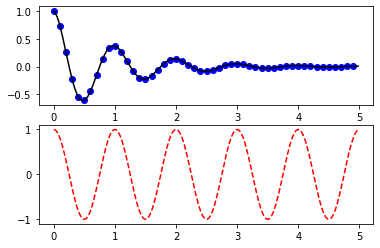

In [191]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure()
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

We don't know the point this graphic is trying to make for a number of reasons: (1) we have no idea what the numbers on the $x$ or $y$ axis represent, (2) the plot doesn't have a title, so we don't know what the overall plot is of, and (3) we don't have the context, so we don't know why we are seeing this plot.

**The purpose of a plot is to provide evidence or support for a claim you make.** So for example, suppose that you have two swings, one of which is rusty, and claim that the rusty swing stops earlier than the other. You could conduct an experiment to analyze this: sit the same person on each swing in turn, start them forward of center, and release them, tracking their distance from the normal hanging center of the swing over time. Then, saying that the blue plot represents the position of the person in the more rusted swing over time gives more credibility to your claim.

In general, always explain the point of your plots with proper context, especially when making them publicly accessible.

#### Detail Your Plots

While we now know what the point of the above plot is, we still don't know some key details. How heavy was the person sitting in the swing? How long did you track their position for? Is their position measured in feet, inches, or meters?

To make sure that the plot effectively provides evidence for a claim, this type of information is necessary. However, not all of it has to be included in the plot itself. Typically, it's best if the plot includes a title and labeled axes, like this:

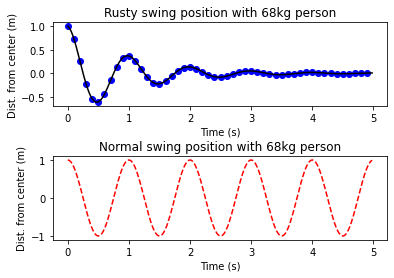

In [206]:
X_LABEL = "Time (s)"
Y_LABEL = "Dist. from center (m)"
TITLE = "{} swing position with 68kg person"

plt.figure()
plt.subplot(211)
plt.title(TITLE.format("Rusty"))
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

plt.subplot(212)
plt.title(TITLE.format("Normal"))
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.xlabel(X_LABEL)
plt.ylabel(Y_LABEL)

plt.subplots_adjust(hspace=0.6)
plt.show()

It's important to show both the quantity represented and the units when labeling axes. (The exception is if the quantity has no units.) Also, the titles clearly indicate which plot is which and what the plot represents.

#### Explain the Plot

Beyond properly labeling the plots and making a point, it's important to highlight the important parts of the plot so it's clear how the plot provides evidence for your point. Don't assume that the reader will just make the connection on their own. For example, you might write the following after showing the plot above:

> Figure X shows the positions of the two swings over time. As we can see, the rusty swing shows a clear decrease in the distance from the center over time, with the peak distance at less than 50cm from the center at 1 second. The normal swing, on the other hand, has almost the same distance (if not the same) even at 5 seconds, when the rusty swing has almost stopped moving.

This explanation makes it very clear how the plot connects with your claim, and the plot itself includes enough precise information to effectively back up your claim.

### Exercise: Tell a Story with a Plot

In this exercise, you will get some practice with Pyplot as well as the plotting principles discussed above.

Choose some data, either from this worksheet or from one of your previous projects. Make a claim about this data. Then create a plot of the data, including a title, axis labels, and an explanation of how the plot connects to and supports your claim.

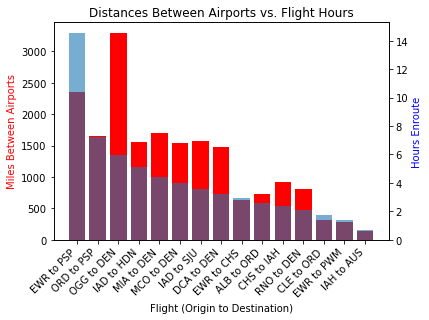

In [216]:
names = []
for i in range(flight_data_dataframe["Origin"].size):
    if i%50==0:
        current_name = flight_data_dataframe["Origin"][i] + " to " + flight_data_dataframe["Destination"][i]
        names.append(current_name)

durations = flight_data_dataframe["Average Flight Time"]/60
durations = durations.tolist()
durations = durations[::50] # Solution found here: https://stackoverflow.com/questions/1403674/pythonic-way-to-return-list-of-every-nth-item-in-a-larger-list

distance_between_airports = [2352.58,1648.43,3297.98,1557.69,1707.72,1544.88,1575.04,1472.09,628.35,721.27,923.02,802.13,314.72,284.41,140.01] # I found these manually using Google Maps

plt.figure()
plt.bar(names, distance_between_airports, color="red")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Flight (Origin to Destination)")
plt.ylabel("Miles Between Airports", color="red")
plt.title("Distances Between Airports vs. Flight Hours")

plt2 = plt.twinx()
plt2.bar(names, durations, alpha=0.6)
plt.ylabel("Hours Enroute", color="blue")
plt.show()

The above figure shows the distance between a given set of airports "as the crow flies". Before making the plot, I believed the distance between a set of airports would be proportional to the length of a flight between them. As shown in this plot, however, the distance between a given set of airports (plotted in red) appears to be almost randomly correlated to the length of a flight between them (plotted in translucent blue). While the data loosely aligns, outliers like OGG to DEN throw the perceived alignment off.

## Exercise: Mystery Datasets

In this exercise, you will analyze four datasets using various techniques.

The locations of the files are defined below for your convenience.

In [247]:
import os
data_folder = "data"
file_1 = os.path.join(data_folder, "data_science_1.csv")
file_2 = os.path.join(data_folder, "data_science_2.csv")
file_3 = os.path.join(data_folder, "data_science_3.csv")
file_4 = os.path.join(data_folder, "data_science_4.csv")

These files represent sets of $x$ and $y$ coordinates. Your job is to talk about how these datasets are similar and different. To do this, you can use summary statistics, try to fit/plot the data, etc.

Then construct a short "computational essay" below, where you explain the similarities and differences among the datasets and intersperse text and code.

### Answer

We'll begin by formatting the data in a way that will be helpful later. In this case, that means reading each file as a Pandas dataframe and as a set of x- and y-coordinates, formatted as lists.

In [248]:
file_1_dataframe = pd.read_csv(file_1, header=None)
file_1_x = file_1_dataframe.iloc[:,0].tolist()
file_1_y = file_1_dataframe.iloc[:,1].tolist()

file_2_dataframe = pd.read_csv(file_2, header=None)
file_2_x = file_2_dataframe.iloc[:,0].tolist()
file_2_y = file_2_dataframe.iloc[:,1].tolist()

file_3_dataframe = pd.read_csv(file_3, header=None)
file_3_x = file_3_dataframe.iloc[:,0].tolist()
file_3_y = file_3_dataframe.iloc[:,1].tolist()

file_4_dataframe = pd.read_csv(file_4, header=None)
file_4_x = file_4_dataframe.iloc[:,0].tolist()
file_4_y = file_4_dataframe.iloc[:,1].tolist()

Next, we'll get some information about each file, to be thorough:

In [252]:
print("Info about file 1:\n", file_1_dataframe.describe(), sep='')
print("\nInfo about file 2:\n", file_2_dataframe.describe(), sep='')
print("\nInfo about file 3:\n", file_3_dataframe.describe(), sep='')
print("\nInfo about file 4:\n", file_4_dataframe.describe(), sep='')

Info about file 1:
               0          1
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031568
min     4.000000   4.260000
25%     6.500000   6.315000
50%     9.000000   7.580000
75%    11.500000   8.570000
max    14.000000  10.840000

Info about file 2:
               0          1
count  11.000000  11.000000
mean    9.000000   7.500909
std     3.316625   2.031657
min     4.000000   3.100000
25%     6.500000   6.695000
50%     9.000000   8.140000
75%    11.500000   8.950000
max    14.000000   9.260000

Info about file 3:
               0          1
count  11.000000  11.000000
mean    9.000000   7.500091
std     3.316625   2.030682
min     4.000000   5.390000
25%     6.500000   6.250000
50%     9.000000   7.110000
75%    11.500000   7.980000
max    14.000000  12.741000

Info about file 4:
               0          1
count  11.000000  11.000000
mean    9.000000   7.500000
std     3.316625   2.030478
min     8.000000   5.250000
25%     8.000000   6.1700

What do we know? Well, first, based on the "count" section, each file appears to be the same size (same number of rows and columns). Interestingly, the maximum x-value of each of the first three files is 14, while the last file's maximum x-value is 19. Also curiously, the mean and standard deviation of the x-values and y-values of all of the datasets are consistently the same. While we don't know whether or not these datasets are correlated, this may be an indicator of a relationship between them. At this point, we could try to do more analysis, but I think it would be more useful to plot the data and see what happens:

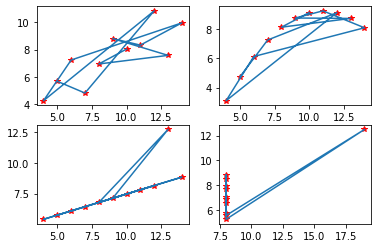

In [251]:
plt.figure()

plt.subplot(221)
plt.plot(file_1_x, file_1_y, "r*")
plt.plot(file_1_x, file_1_y, "-")

plt.subplot(222)
plt.plot(file_2_x, file_2_y, "r*")
plt.plot(file_2_x, file_2_y, "-")

plt.subplot(223)
plt.plot(file_3_x, file_3_y, "r*")
plt.plot(file_3_x, file_3_y, "-")

plt.subplot(224)
plt.plot(file_4_x, file_4_y, "r*")
plt.plot(file_4_x, file_4_y, "-")

plt.show()

Much better! The first file appears to be pretty randomly-scattered data, but it might be increasing approximately linearly. The second file appears to be a quadratic-ish function of some sort. Interestingly, none of the data points thus far seem to be in the order we would expect (take the second file, for example, which has connecting lines all over it).

The third file looks like a linear increase with one outlier. This might be data from a scientific instrument, and the outlier might be an incorrect reading, for example. The fourth file is similar, having one outlier, but the majority of the data lies upon one x-value.